# MODIS Gross Primary Production

1. global land cover types
- 

key features:
- Global Land Cover Types: The dataset identifies different types of land cover, such as forests, grasslands, croplands, urban areas, wetlands, and water bodies. These categories help researchers understand how land is being used or altered, as well as the distribution of natural and human-modified landscapes.

- Annual Updates: The data is produced on a yearly basis from 2001 to 2020, providing a long-term view of land cover changes. This makes it useful for studying trends, such as deforestation, urbanization, agricultural expansion, and natural vegetation shifts due to climate change or human activity.

- Derived from MODIS Data: The dataset is generated using reflectance data collected by the MODIS instruments on NASA's Terra and Aqua satellites. These instruments capture images of Earth's surface in different spectral bands, which are then analyzed to classify different land cover types.

- Supervised Classification: The land cover types are determined using a supervised classification method. This means that pre-labeled training data (where land cover types are already known) is used to guide the classification of satellite imagery, allowing the model to predict land cover types for the entire globe.

- Post-Processing with Prior Knowledge: After the initial classification, the data undergoes additional refinement using ancillary information (e.g., topographic data, climate information) and prior knowledge about specific regions to improve accuracy, especially in cases where certain land cover types may be difficult to distinguish using satellite imagery alone.

- Multiple Classification Schemes: The data product includes land cover classifications according to six different schemes, catering to various research needs. These schemes include widely used classification systems such as:

- International Geosphere-Biosphere Programme (IGBP): Commonly used for ecological and environmental studies.
University of Maryland (UMD): Emphasizes different land cover types useful for vegetation analysis.

- MODIS Land Cover: A MODIS-specific scheme for consistency in land cover monitoring.

Other classification systems tailored for specific studies or applications.

In [4]:
import numpy as np
import pandas as pd

import rasterio
from rasterio.plot import show
from matplotlib import pyplot as plt
import os

### GPP

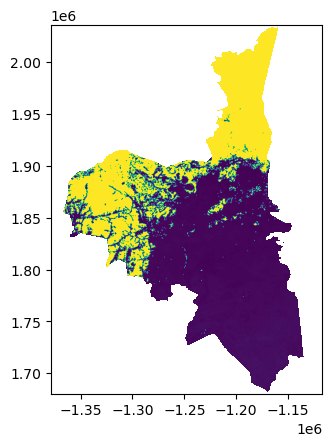

CRS (Coordinate Reference System): PROJCS["unnamed",GEOGCS["GCS_Unknown_datum_based_upon_the_custom_spheroid",DATUM["D_Not_specified_based_on_custom_spheroid",SPHEROID["Custom_spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Transform: | 463.31, 0.00,-1378818.64|
| 0.00,-463.31, 2036259.39|
| 0.00, 0.00, 1.00|
Width: 565
Height: 769
Data shape: (769, 565)


In [5]:
with rasterio.open('Datasets_Hackathon/Gross_Primary_Production_GPP/2010_GP.tif') as dataset:
    # visualize tif data
    show(dataset)
    
    # obtain geographical info
    print("CRS (Coordinate Reference System):", dataset.crs)
    print("Transform:", dataset.transform)  # projection matrix
    print("Width:", dataset.width)
    print("Height:", dataset.height)
    
    # read data
    data = dataset.read(1)  # read 
    print("Data shape:", data.shape)

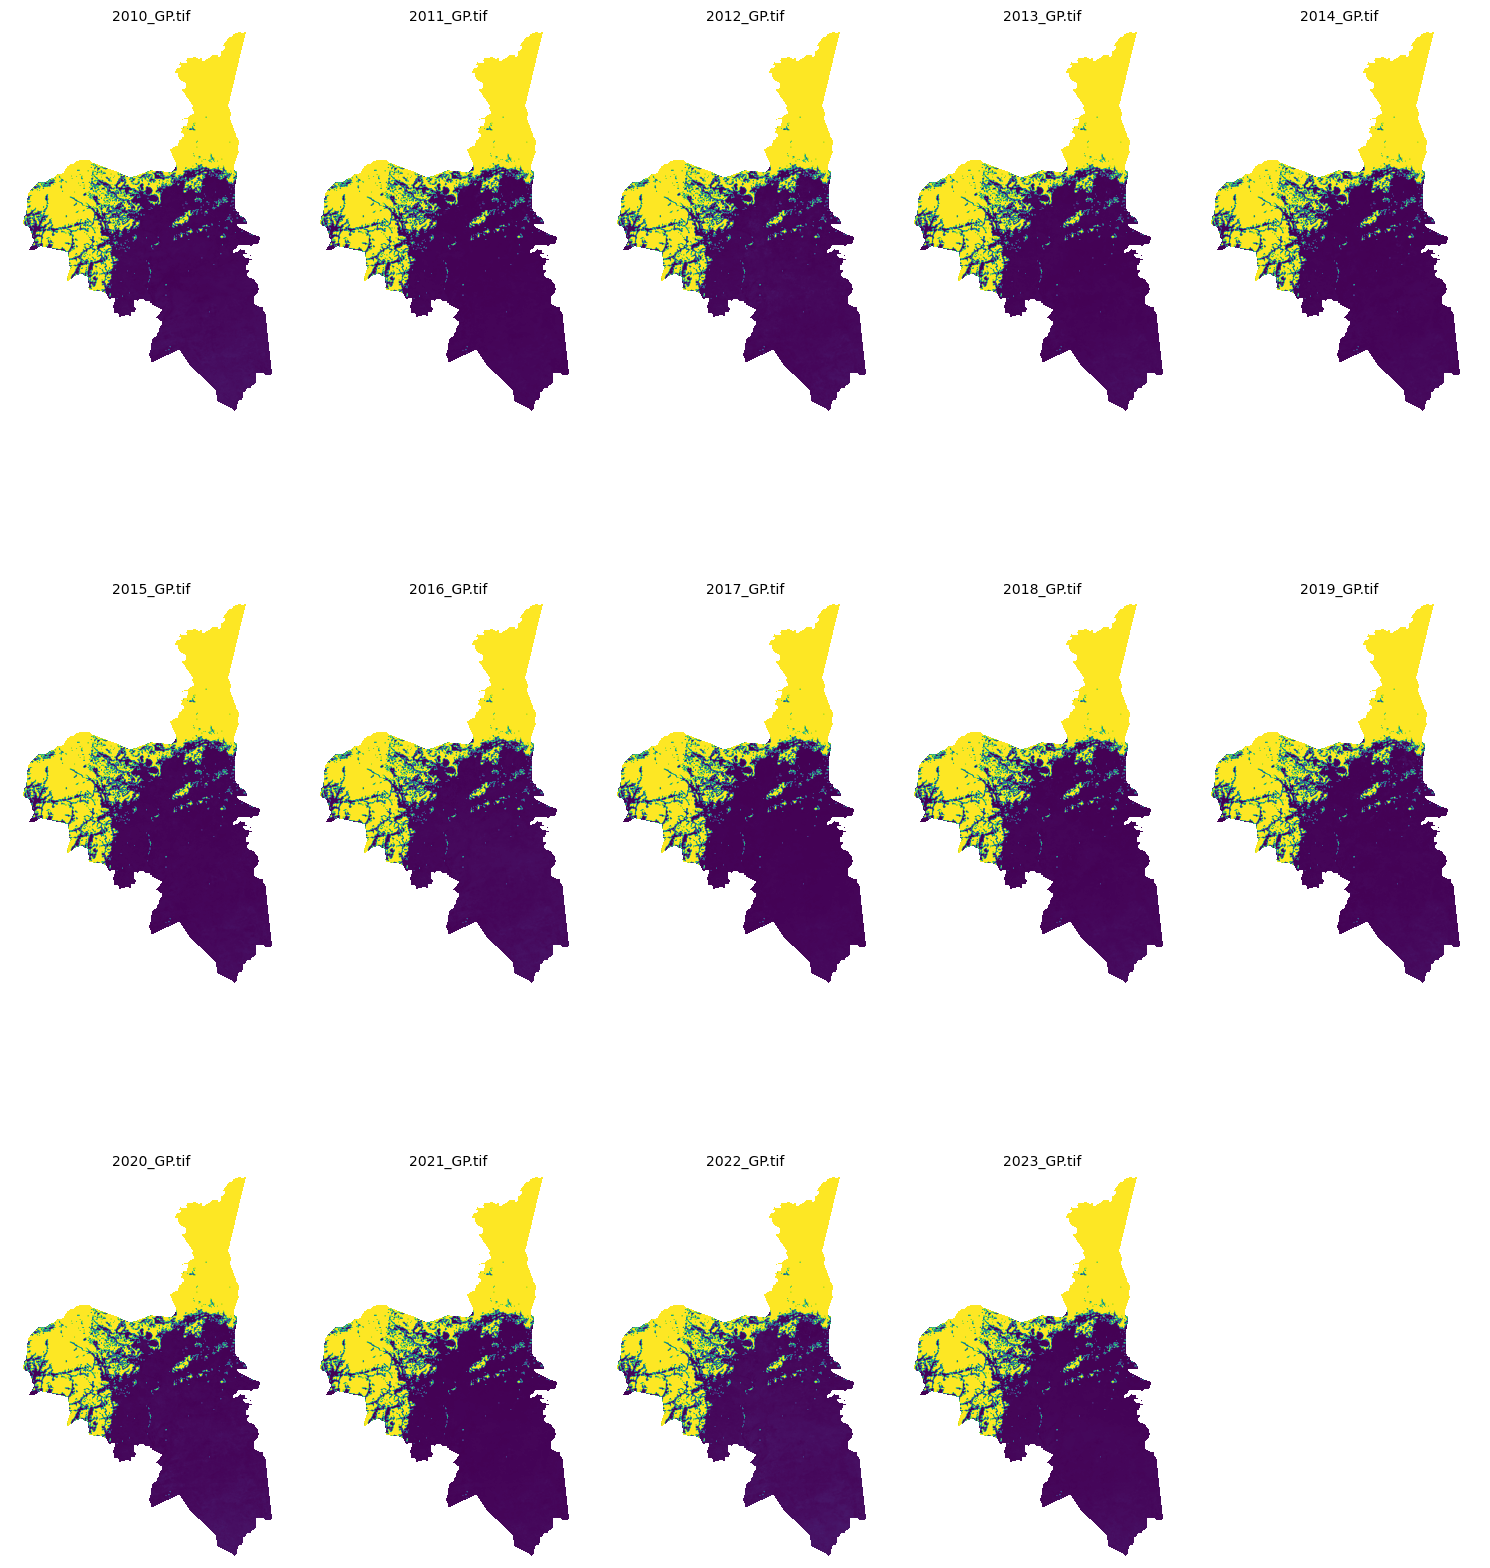

In [6]:
# path for GPP folder
folder_path = 'Datasets_Hackathon/Gross_Primary_Production_GPP/'

# path for all GPP tif files
tif_files = [f for f in os.listdir(folder_path) if f.endswith('.tif')]
tif_files = sorted(tif_files, key=lambda x: int(x[:4]))

num_columns = 5
num_rows = (len(tif_files) + num_columns - 1) // num_columns
plt.figure(figsize=(15, num_rows * 6))

for idx, tif_file in enumerate(tif_files):
    tif_path = os.path.join(folder_path, tif_file)
    
    with rasterio.open(tif_path) as dataset:
        ax = plt.subplot(num_rows, num_columns, idx + 1)
        show(dataset, ax=ax)
        ax.set_title(tif_file, fontsize=10)
        ax.set_axis_off()

plt.tight_layout()
plt.show()


In [7]:
with rasterio.open('Datasets_Hackathon/Gross_Primary_Production_GPP/2010_GP.tif') as dataset:
    # 查看所有的 metadata
    metadata = dataset.tags()
    print("Metadata:", metadata)

Metadata: {'TIFFTAG_SOFTWARE': 'GDAL 3.9.2e (3090211) (4.6.0;1710;3.0.3;2.1.6;;0x10400;5.4.7;4.0.0;), PROJ 9.4.1 (EPSG.VERSION=v11.006;EPSG.DATE=2024-03-13;ESRI.VERSION=ArcGIS Pro 3.3;ESRI.DATE=2024-05-07;PROJ_DATA.VERSION=1.18;)', 'AREA_OR_POINT': 'Area'}


### Land cover

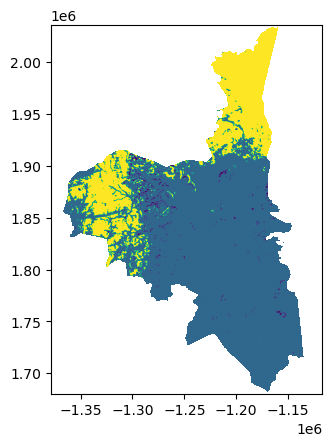

CRS (Coordinate Reference System): PROJCS["Unknown_datum_based_upon_the_custom_spheroid_Sinusoidal",GEOGCS["GCS_Unknown_datum_based_upon_the_custom_spheroid",DATUM["D_Not_specified_based_on_custom_spheroid",SPHEROID["Custom_spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Transform: | 463.31, 0.00,-1378818.64|
| 0.00,-463.31, 2036259.39|
| 0.00, 0.00, 1.00|
Width: 565
Height: 769
Data shape: (769, 565)


In [8]:
with rasterio.open('Datasets_Hackathon/Land_Cover_Data/2010LCT.tif') as dataset:
    # 
    show(dataset)
        
    # 
    print("CRS (Coordinate Reference System):", dataset.crs)
    print("Transform:", dataset.transform)  # 
    print("Width:", dataset.width)
    print("Height:", dataset.height)
    
    # 
    data = dataset.read(1)  # 
    print("Data shape:", data.shape)

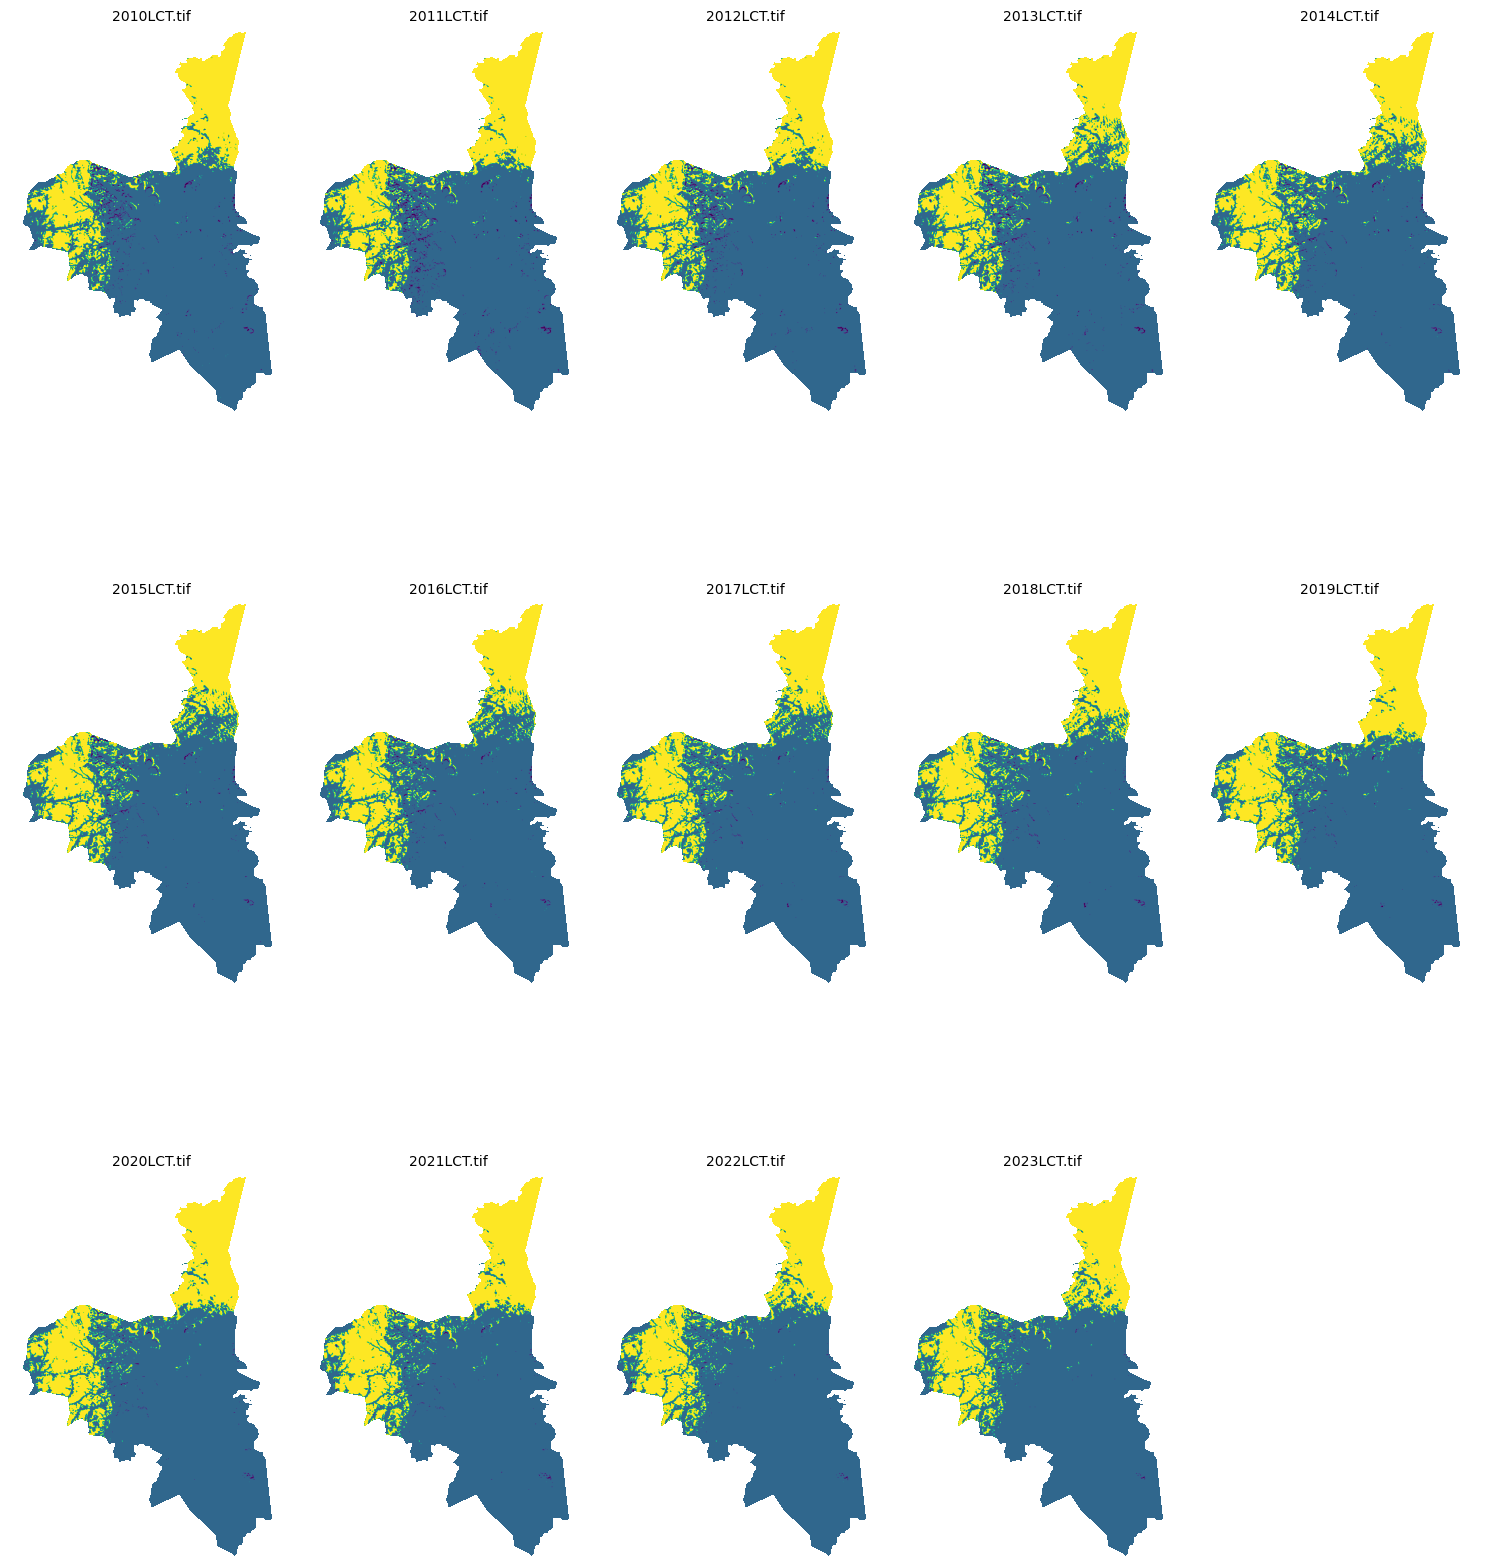

In [9]:
# path for Land Cover folder
folder_path = 'Datasets_Hackathon/Land_Cover_Data/'

# path for all GPP tif files
tif_files = [f for f in os.listdir(folder_path) if f.endswith('.tif')]
tif_files = sorted(tif_files, key=lambda x: int(x[:4]))

num_columns = 5
num_rows = (len(tif_files) + num_columns - 1) // num_columns
plt.figure(figsize=(15, num_rows * 6))

for idx, tif_file in enumerate(tif_files):
    tif_path = os.path.join(folder_path, tif_file)
    
    with rasterio.open(tif_path) as dataset:
        ax = plt.subplot(num_rows, num_columns, idx + 1)
        show(dataset, ax=ax)
        ax.set_title(tif_file, fontsize=10)
        ax.set_axis_off()

plt.tight_layout()
plt.show()


# Urban expansion impact 

In [10]:
import geopandas as gpd

In [11]:
# load main road file
shapefile_path = "Datasets_Hackathon/Streamwater_Line_Road_Network/Main_Road.shp"
gdf = gpd.read_file(shapefile_path)

# 读取 GeoTIFF 数据
tif_path = "Datasets_Hackathon/Gross_Primary_Production_GPP/2010_GP.tif"
with rasterio.open(tif_path) as src:
    # 获取 GeoTIFF 的 CRS
    tif_crs = src.crs

# 获取 Shapefile 的 CRS
shp_crs = gdf.crs

# 比较 CRS 是否一致
if shp_crs == tif_crs:
    print("Shapefile and GeoTIFF is in the same CRS")
else:
    print("Shapefile and GeoTIFF is NOT in the same CRS")
    print(f"Shapefile CRS: {shp_crs}")
    print(f"GeoTIFF CRS: {tif_crs}")


Shapefile and GeoTIFF is NOT in the same CRS
Shapefile CRS: EPSG:4326
GeoTIFF CRS: PROJCS["unnamed",GEOGCS["GCS_Unknown_datum_based_upon_the_custom_spheroid",DATUM["D_Not_specified_based_on_custom_spheroid",SPHEROID["Custom_spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [12]:
shp_crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
gdf = gdf.to_crs(tif_crs)

# 检查转换后的 CRS
print("Converted Shapefile CRS:", gdf.crs)

Converted Shapefile CRS: PROJCS["unnamed",GEOGCS["GCS_Unknown_datum_based_upon_the_custom_spheroid",DATUM["D_Not_specified_based_on_custom_spheroid",SPHEROID["Custom_spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


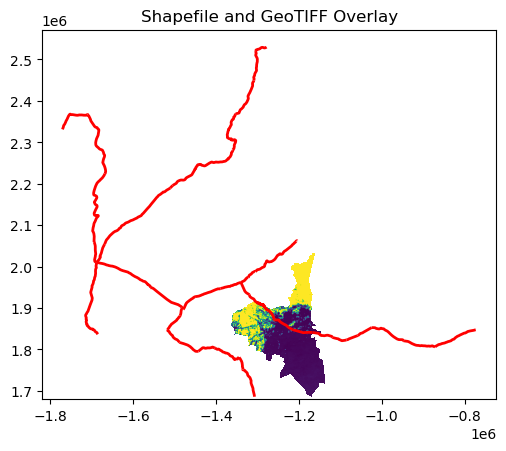

In [14]:
fig, ax = plt.subplots()
with rasterio.open(tif_path) as src:
    img_data = src.read(1) 
    transform = src.transform
    crs = src.crs
    show(src, ax=ax)

    gdf.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)

ax.set_title("Shapefile and GeoTIFF Overlay")

# 显示图像
plt.show()

# Population

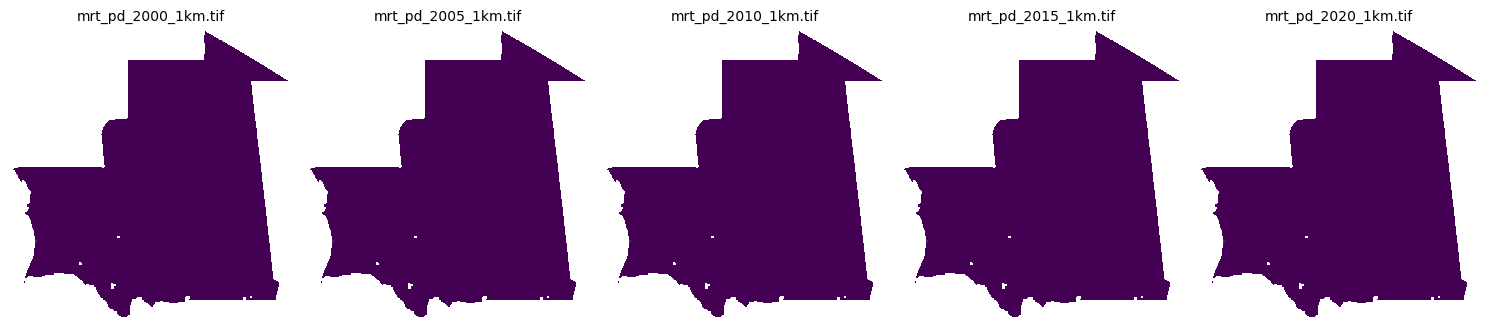

In [15]:
# path for Land Cover folder
folder_path = 'Datasets_Hackathon/Gridded_Population_Density_Data'

# path for all GPP tif files
tif_files = [f for f in os.listdir(folder_path) if (f.endswith('.tif') and f.startswith('mrt'))]
tif_files = sorted(tif_files, key=lambda x: int(x.split('_')[2]))

num_columns = 5
num_rows = (len(tif_files) + num_columns - 1) // num_columns
plt.figure(figsize=(15, num_rows * 6))

for idx, tif_file in enumerate(tif_files):
    tif_path = os.path.join(folder_path, tif_file)
    
    with rasterio.open(tif_path) as dataset:
        ax = plt.subplot(num_rows, num_columns, idx + 1)
        show(dataset, ax=ax)
        ax.set_title(tif_file, fontsize=10)
        ax.set_axis_off()

plt.tight_layout()
plt.show()

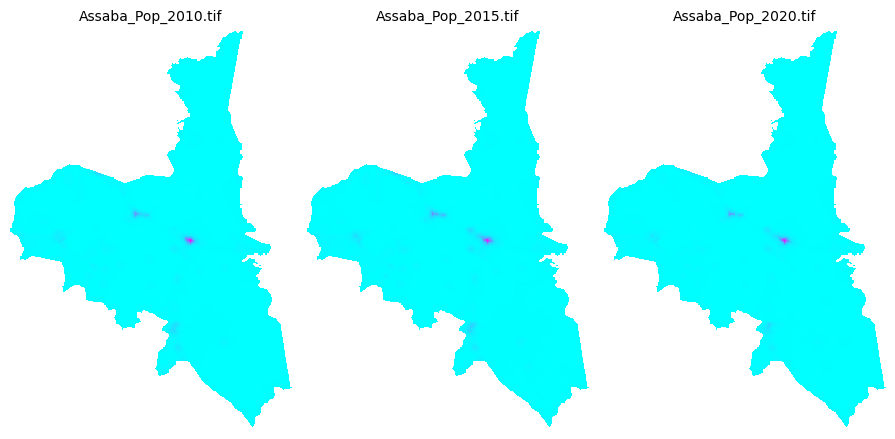

In [16]:
# path for Land Cover folder
folder_path = 'Datasets_Hackathon/Gridded_Population_Density_Data'

# path for all GPP tif files
tif_files = [f for f in os.listdir(folder_path) if (f.endswith('.tif') and f.startswith('Assaba'))]
tif_files = sorted(tif_files, key=lambda x: int(x.split('.')[0][-4:]))

num_columns = 5
num_rows = (len(tif_files) + num_columns - 1) // num_columns
plt.figure(figsize=(15, num_rows * 6))

for idx, tif_file in enumerate(tif_files):
    tif_path = os.path.join(folder_path, tif_file)
    
    with rasterio.open(tif_path) as dataset:
        ax = plt.subplot(num_rows, num_columns, idx + 1)
        show(dataset, ax=ax, cmap='cool')
        ax.set_title(tif_file, fontsize=10)
        ax.set_axis_off()

plt.tight_layout()
plt.show()

In [17]:
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.features import geometry_mask

# Define years list
years = range(2010, 2023)

# Define input and output paths
data_path = 'Datasets_Hackathon'
output_path = 'Datasets_Hackathon/reprojected_data'  # Current directory, change as needed

# List of data categories with their appropriate resampling methods and filename formats
datasets = [
    {'name': 'Land_Cover_Data', 'file_format': '{year}LCT.tif', 'is_reference': True},
    {'name': 'Gridded_Population_Density_Data', 'file_format': 'Assaba_Pop_{year}.tif','resampling': Resampling.bilinear},
]

# Dictionary to store data for all years and all datasets
all_data = {}
for dataset in datasets:
    short_name = dataset['name'].split('_')[0].lower()
    all_data[short_name] = {}

# Loop through each year
for year in years:
    print(f"Processing data for year {year}...")
    
    # First, open the reference dataset (GPP)
    ref_dataset = next(d for d in datasets if d['is_reference'])
    ref_file = os.path.join(data_path, ref_dataset['name'], ref_dataset['file_format'].format(year=year))
    
    try:
        with rasterio.open(ref_file) as src_ref:
            # Get reference metadata
            dst_crs = src_ref.crs
            dst_transform = src_ref.transform
            dst_height = src_ref.height
            dst_width = src_ref.width
            
            # Read reference data (land)
            land_data = src_ref.read(1)
            all_data['land'][year] = land_data
            
            # Store reference profile for output files
            profile = src_ref.profile.copy()
            profile.update(dtype=rasterio.float32, count=1)
            
            # Process each non-reference dataset
            for dataset in [d for d in datasets if not d.get('is_reference', False)]:
                dataset_name = dataset['name'].split('_')[0].lower()  # Extract short name
                
                # Construct input filename using the file format template
                input_file = os.path.join(data_path, dataset['name'], dataset['file_format'].format(year=year))
                output_file = os.path.join(output_path, f"{dataset_name}_reprojected_{year}.tif")
                
                # Create destination array
                dst_array = np.zeros((dst_height, dst_width), dtype=rasterio.float32)
                
                # Open and reproject
                try:
                    with rasterio.open(input_file) as src:
                        reproject(
                            source=rasterio.band(src, 1),
                            destination=dst_array,
                            src_transform=src.transform,
                            src_crs=src.crs,
                            dst_transform=dst_transform,
                            dst_crs=dst_crs,
                            resampling=dataset['resampling']
                        )
                        
                        # Store in all_data dictionary by year
                        all_data[dataset_name][year] = dst_array
                        
                        # Save reprojected data
                        with rasterio.open(output_file, 'w', **profile) as dst:
                            dst.write(dst_array, 1)
                            
                        print(f"Successfully reprojected and saved {output_file}")
                        
                except Exception as e:
                    print(f"Error processing {input_file}: {e}")
                    continue

    except Exception as e:
        print(f"Error processing year {year}: {e}")
        continue

Processing data for year 2010...
Successfully reprojected and saved Datasets_Hackathon/reprojected_data\gridded_reprojected_2010.tif
Processing data for year 2011...
Error processing Datasets_Hackathon\Gridded_Population_Density_Data\Assaba_Pop_2011.tif: Datasets_Hackathon\Gridded_Population_Density_Data\Assaba_Pop_2011.tif: No such file or directory
Processing data for year 2012...
Error processing Datasets_Hackathon\Gridded_Population_Density_Data\Assaba_Pop_2012.tif: Datasets_Hackathon\Gridded_Population_Density_Data\Assaba_Pop_2012.tif: No such file or directory
Processing data for year 2013...
Error processing Datasets_Hackathon\Gridded_Population_Density_Data\Assaba_Pop_2013.tif: Datasets_Hackathon\Gridded_Population_Density_Data\Assaba_Pop_2013.tif: No such file or directory
Processing data for year 2014...
Error processing Datasets_Hackathon\Gridded_Population_Density_Data\Assaba_Pop_2014.tif: Datasets_Hackathon\Gridded_Population_Density_Data\Assaba_Pop_2014.tif: No such file 

In [18]:
# 2010,2015,2020 population per pixel
# 1. <0 invalid data ->0
# 2. LAT LON df
# 3. calculation
all_data['gridded']

{2010: array([[-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
        ...,
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38]], dtype=float32),
 2015: array([[-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38]

In [19]:
# Gridded land use -- get the hotspots top3 pixel
# Store transformed dataframes
df_dict = {}

# Process each year's array
for year, array in all_data['gridded'].items():
    # Replace negative values with 0
    array = np.maximum(array, 0)

    # Get row (lat) and column (lon) indices
    rows, cols = np.indices(array.shape)

    # Convert to DataFrame
    df = pd.DataFrame({
        'lat': rows.flatten(),  # Row index as latitude
        'lon': cols.flatten(),  # Column index as longitude
        'value': array.flatten()  # Flattened values
    })

    # Store in dictionary
    df_dict[year] = df
    
    # create population dataframe for finalised merged df
    population_df_list = []
    for year, df in df_dict.items():
        # Add a 'year' column to each DataFrame
        df['year'] = year
        
        # Append the DataFrame to the list
        population_df_list.append(df)

    # Concatenate all DataFrames into a single DataFrame
    population_df = pd.concat(population_df_list, ignore_index=True)

    population_df.to_csv('population_df.csv')

# Compute differences
df_diff_2015_2010 = df_dict[2015].copy()
df_diff_2020_2015 = df_dict[2020].copy()

# Subtract values
df_diff_2015_2010['value'] -= df_dict[2010]['value']
df_diff_2020_2015['value'] -= df_dict[2015]['value']

# rename value column to avoid confusion
df_diff_2015_2010 = df_diff_2015_2010.rename(columns={'value': 'diff'})
df_diff_2020_2015 = df_diff_2020_2015.rename(columns={'value': 'diff'})

# Sort df_diff_20xx_20xx in descending order
df_diff_2015_2010_sorted = df_diff_2015_2010.sort_values(by='diff', ascending=False)
df_diff_2020_2015_sorted = df_diff_2020_2015.sort_values(by='diff', ascending=False)

# Extract the top 3 largest and bottom 3 smallest values
top_3_2015_2010 = df_diff_2015_2010_sorted.head(3)
bottom_3_2015_2010 = df_diff_2015_2010_sorted.tail(3)
selected_2015_2010 = pd.concat([top_3_2015_2010, bottom_3_2015_2010], ignore_index=True)
selected_2015_2010['year'] = 2015
selected_2015_2010['type'] = 'population'

# Extract the top 3 largest and bottom 3 smallest values
top_3_2020_2015 = df_diff_2020_2015_sorted.head(3)
bottom_3_2020_2015 = df_diff_2020_2015_sorted.tail(3)
selected_2020_2015 = pd.concat([top_3_2020_2015, bottom_3_2020_2015], ignore_index=True)
selected_2020_2015['year'] = 2020
selected_2020_2015['type'] = 'population'


In [20]:
# GPP extract the top 3 largest and bottem 3 smallest data point
gross_df = pd.read_csv('merged_df.csv')

# Extract data for each year
df_2010 = gross_df[gross_df['year'] == 2010][['lat', 'lon', 'gross']]
df_2015 = gross_df[gross_df['year'] == 2015][['lat', 'lon', 'gross']]
df_2020 = gross_df[gross_df['year'] == 2020][['lat', 'lon', 'gross']]

# Merge on lat and lon
gross_df_2015_2010 = df_2015.merge(df_2010, on=['lat', 'lon'], suffixes=('_2015', '_2010'))
gross_df_2020_2015 = df_2020.merge(df_2015, on=['lat', 'lon'], suffixes=('_2020', '_2015'))


# Compute difference
gross_df_2015_2010['diff'] = gross_df_2015_2010['gross_2015'] - gross_df_2015_2010['gross_2010']
gross_df_2020_2015['diff'] = gross_df_2020_2015['gross_2020'] - gross_df_2020_2015['gross_2015']


# Keep only relevant columns
gross_df_2020_2015 = gross_df_2020_2015[['lat', 'lon', 'diff']]
gross_df_2015_2010 = gross_df_2015_2010[['lat', 'lon', 'diff']]

# Sort by 'value' in descending order
gross_df_diff_2015_2010_sorted = gross_df_2015_2010.sort_values(by='diff', ascending=False)
gross_df_diff_2020_2015_sorted = gross_df_2020_2015.sort_values(by='diff', ascending=False)

# Extract the top 3 largest and bottom 3 smallest values
gross_top_3_2015_2010 = gross_df_diff_2015_2010_sorted.head(3)
gross_bottom_3_2015_2010 = gross_df_diff_2015_2010_sorted.tail(3)
gross_select_2015_2010 = pd.concat([gross_top_3_2015_2010, gross_bottom_3_2015_2010], ignore_index=True)
gross_select_2015_2010['year'] = 2015
gross_select_2015_2010['type'] = 'gpp'

gross_top_3_2020_2015 = gross_df_diff_2020_2015_sorted.head(3)
gross_bottom_3_2020_2015 = gross_df_diff_2020_2015_sorted.tail(3)
gross_select_2020_2015 = pd.concat([gross_top_3_2020_2015, gross_bottom_3_2020_2015], ignore_index=True)
gross_select_2020_2015['year'] = 2020
gross_select_2020_2015['type'] = 'gpp'


In [21]:

# concat the dataframes
dfs = [selected_2015_2010, selected_2020_2015, gross_select_2015_2010, gross_select_2020_2015]
combined_df = pd.concat(dfs, ignore_index=True)
combined_df.to_csv('combined_population_gpp_pixcel.csv', index=False)


In [ ]:
# add Admin layers



In [48]:
arrrr = all_data['gridded'][2010]
filtered_arr = arrrr[arrrr >= 0]
len(filtered_arr)

167202

In [45]:
num_unique

166839

# Climate Precipitation

/Users/sishanyang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/image.py:503: RuntimeWarning: overflow encountered in multiply
  A_resampled *= ((a_max - a_min) / frac)


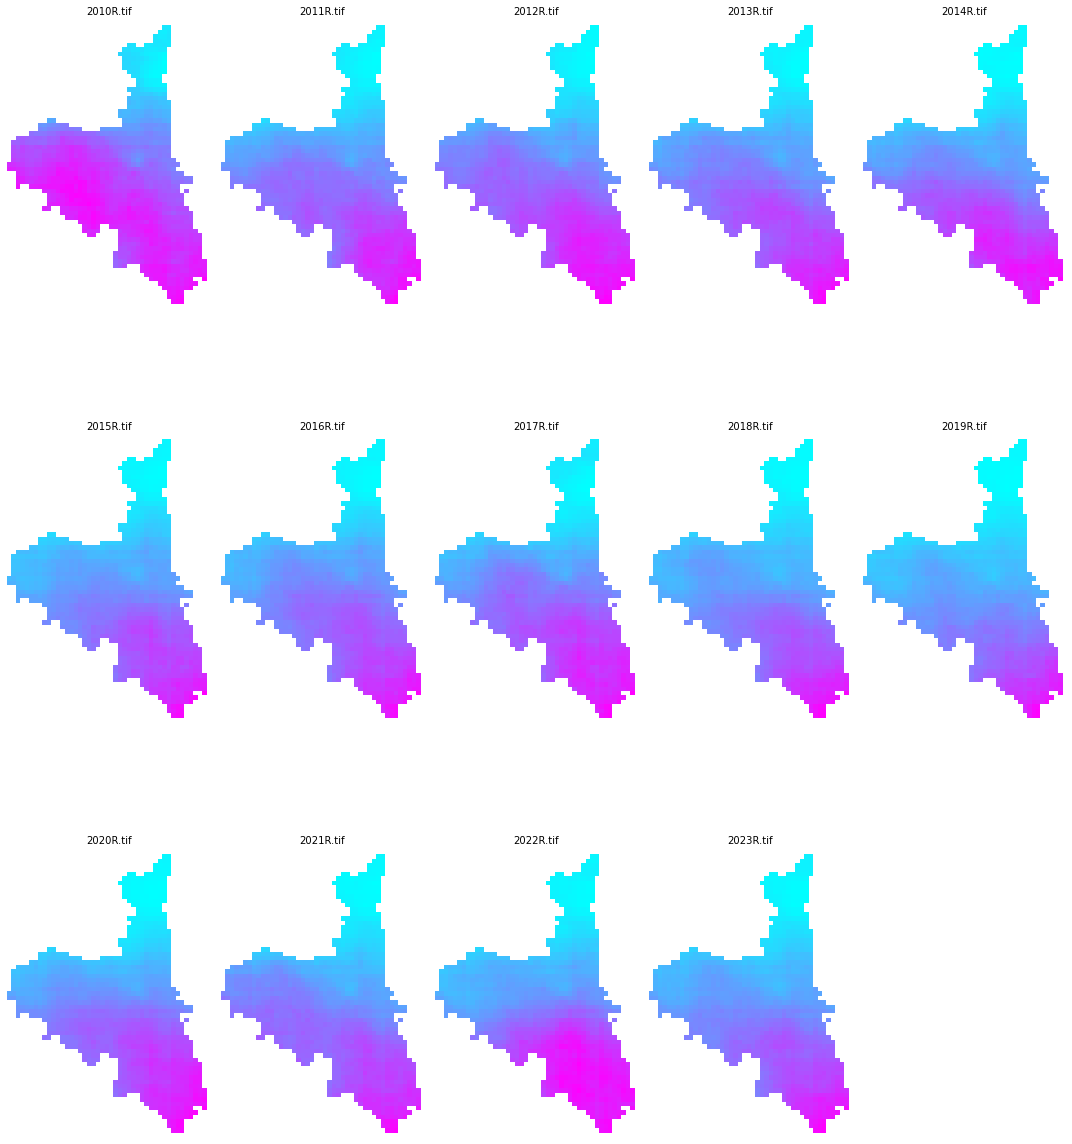

In [35]:
# path for Land Cover folder
folder_path = 'Datasets_Hackathon/Climate_Precipitation_Data'

# path for all GPP tif files
tif_files = [f for f in os.listdir(folder_path) if f.endswith('.tif')]
tif_files = sorted(tif_files, key=lambda x: int(x.split('.')[0][-5:-1]))

num_columns = 5
num_rows = (len(tif_files) + num_columns - 1) // num_columns
plt.figure(figsize=(15, num_rows * 6))

for idx, tif_file in enumerate(tif_files):
    tif_path = os.path.join(folder_path, tif_file)
    
    with rasterio.open(tif_path) as dataset:
        ax = plt.subplot(num_rows, num_columns, idx + 1)
        show(dataset, ax=ax, cmap='cool')
        ax.set_title(tif_file, fontsize=10)
        ax.set_axis_off()

plt.tight_layout()
plt.show()